#Statistic lab Ex3

*By:\
Ariel Ginensky: 312297559\
Ron Tzidon 315313577\
Shahar Zismanovich 205518905*


##Question 1


In [ ]:
import random
import pandas as pd
import numpy as np
import collections
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('votes per city 2021.csv', encoding = "ISO-8859-8").iloc[:-1,:-1]


**a)**

In [ ]:
def two_parties_scatter(df, party1, party2):
    bzb = (df["בזב"] / df["בזב"].max()) * 200
    plt.figure(figsize = (5,5))
    plt.scatter(df[party1], df[party2] , s = bzb)
    plt.xlabel(party1[::-1],fontsize = 20)
    plt.ylabel(party2[::-1],fontsize = 20)
    plt.title('Scatter for parties' + " " +party1[::-1] + " vs. " + party2[::-1],fontsize = 30)
    plt.show()

**b)**

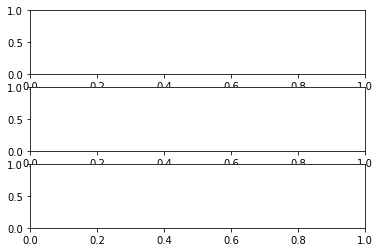

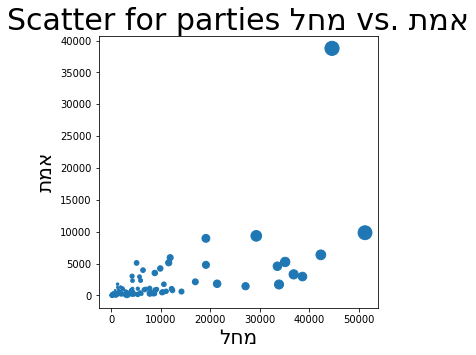

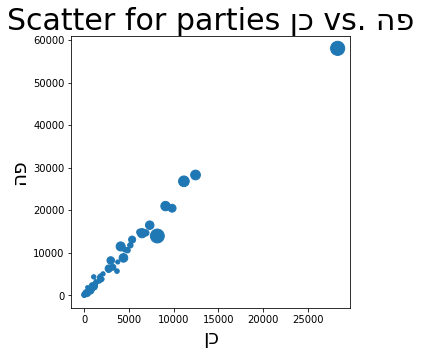

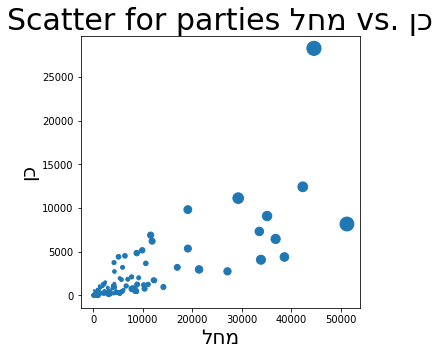

In [ ]:
fig, (ax1, ax2,ax3) = plt.subplots(3,sharex = False)
ax1 = two_parties_scatter(df, "מחל","אמת")
ax2 = two_parties_scatter(df, "כן","פה")
ax3 =  two_parties_scatter(df, "מחל","כן")



1. We can see in the first graph that most cities voting for these parties has somewhere between 0-20,000 voters, only three cotoes above 40,000 voters. That can tell us that 3 of the above 40000 people voted(we can define it as medium-big cities) voted for one of the partys presented in the graph.

2. We can notice a clear trend! The linear structure can indicate us that the distribution of voters voting for one of the two parties is linear by the number of voters across the country. Sometimes a similar numbers of voters as well.

3. We can see a noticable variance between the points that can indicate on variety of city sizes and percentage of voters in each city.


##Question 2
**a)**

In [ ]:
party_df = pd.DataFrame(df.iloc[:,7:46]).rename(columns = {0 : "Votes"})


In [ ]:
p_names = ['מחל','פה','שס','ב','כן','אמת','ת','ל','ג','מרצ','ט','ודעם','עם']
p_dict = {'מחל': 'הליכוד','פה': 'יש עתיד','כן': 'כחול לבן','ב': 'ימינה'
,'אמת': 'עבודה','ג': 'יהדות התורה', "ל":"ישראל ביתנו","ט":"הציונות הדתית","ודעם":"המשותפת",
        "ת":"תקווה חדשה", "עם":"רעם"}


In [ ]:
new_df = party_df.loc[:,p_names]
new_df.rename(columns=p_dict, inplace=True)
new_df

,הליכוד,יש עתיד,שס,ימינה,כחול לבן,עבודה,תקווה חדשה,ישראל ביתנו,יהדות התורה,מרצ,הציונות הדתית,המשותפת,רעם
0,5,27,1,0,16,47,8,2,0,31,2,3,0
1,84,2,61,7,3,1,6,0,4,0,9,0,0
2,24,86,0,7,37,72,15,8,0,20,0,3,0
3,27,37,2,4,36,14,8,3,0,10,4,0,0
4,17,0,1,4,5,0,0,0,0,0,10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,123,80,13,42,42,27,29,16,0,18,19,1,0
1210,32,150,0,18,73,89,15,10,0,98,3,1,0
1211,32,81,0,19,38,60,25,7,0,21,1,3,0
1212,14,121,1,17,61,101,36,12,0,68,4,3,0


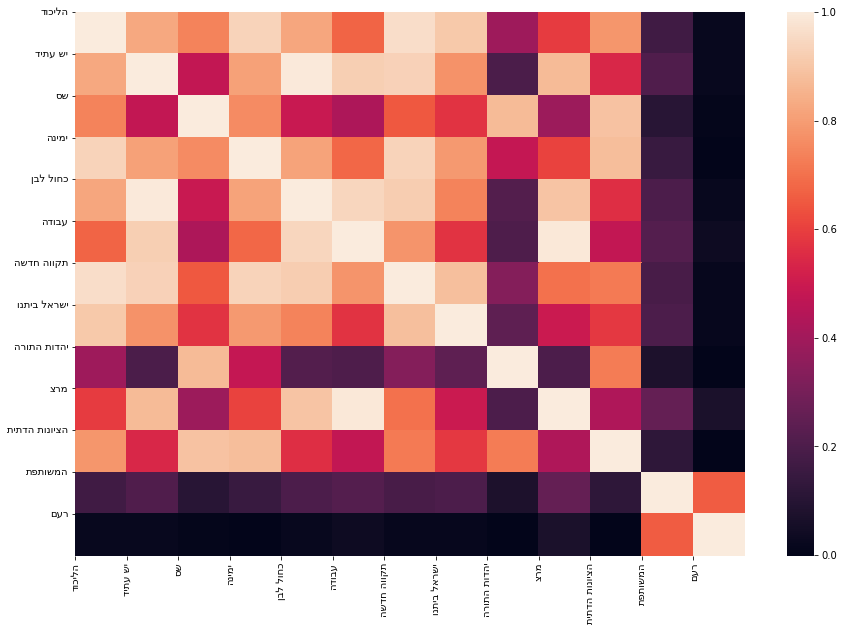

In [ ]:
names = new_df.keys()
x_axis = np.arange(len(names))
fixed_names = [name[::-1] for name in names]
plt.figure(figsize = (15,10))
heat_view = sns.heatmap(new_df.corr(), annot=False)
plt.xticks(x_axis,fixed_names)
plt.yticks(x_axis,fixed_names)
heat_view

**b**)

In [ ]:
sorted_parties_names = ['המשותפת','רעם','מרצ','עבודה', 'כחול לבן','יש עתיד','שס','יהדות התורה','הליכוד','תקווה חדשה','ישראל ביתנו','ימינה','הציונות הדתית']
new_df_B = new_df[sorted_parties_names]


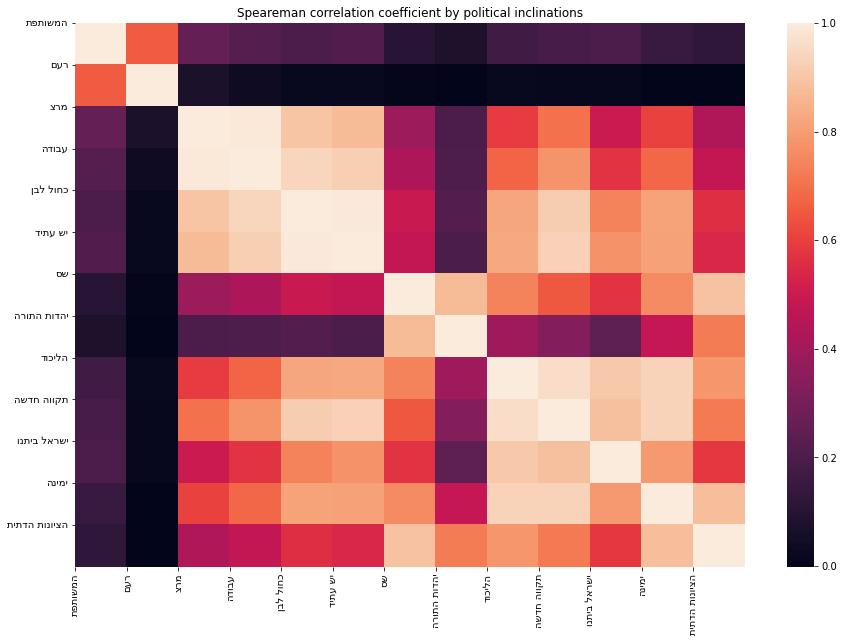

In [ ]:
fixed_sorted_parties = [name[::-1] for name in sorted_parties_names]
plt.figure(figsize = (15,10))
heat_view_B = sns.heatmap(new_df_B.corr(), annot=False).set(title = "Speareman correlation coefficient by political inclinations")
plt.xticks(x_axis,fixed_sorted_parties)
plt.yticks(x_axis,fixed_sorted_parties)
heat_view

#Question 3
**a)**

Here we created a propability table for votes per party by city, only by the legal votes.

In [ ]:
legel_votes = np.array(df['כשרים'])
legel_votes_ratio = 1/legel_votes

prob_party_per_city = party_df.multiply(legel_votes_ratio, axis=0)



Here we calculate the results of the votes, if all people with the right to vote did indeed vote. We rely on the previous propability vector.

In [ ]:
total_votes = np.array(df['בזב'])
full_voting_res = prob_party_per_city.multiply(total_votes, axis=0)

We creat a vector of the probability of each party by the sum of votes country-wide, if all people would vote.

In [ ]:
total_votes_per_party = full_voting_res.sum()
total_votes_prob = total_votes_per_party/total_votes_per_party.sum()



We selected the 13 largest parties from the new hypothetical results if all people voted.

In [ ]:
largest_correction_prob = total_votes_prob.nlargest(13)



We creat a vector of the probability of each party by the sum of actuall votes country-wide. Finaly, we select the 13 largest parties.

In [ ]:
votes_per_party = party_df.sum()
real_prob = votes_per_party/legel_votes.sum()
largest_real_prob = real_prob.nlargest(13)

We creat a bar plot for hypothetical frequncy vs. real frequency

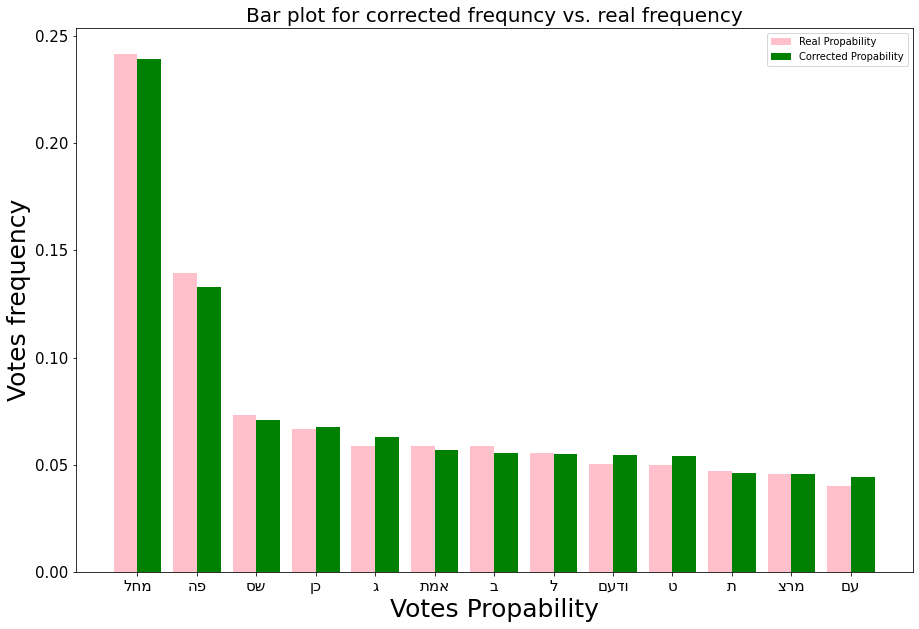

In [ ]:
names = largest_real_prob.keys()
fixed_names = [name[::-1] for name in names]
X = fixed_names
real_prob = largest_real_prob.values
correct_prob = largest_correction_prob.values
  
X_axis = np.arange(len(X))

plt.figure(figsize=(15,10)) 
plt.bar(X_axis - 0.2,real_prob, 0.4, label = 'Real Propability', color = 'pink')
plt.bar(X_axis + 0.2, correct_prob, 0.4, label = 'Corrected Propability',color = 'green')
plt.xticks(X_axis, X,fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Votes Propability",fontsize = 25)
plt.ylabel("Votes frequency",fontsize = 25)
plt.title("Bar plot for corrected frequncy vs. real frequency",fontsize = 20)
plt.legend()
plt.show()

**b)**

We create a table of votes per ballot, a vector of legel votes per ballot and a vector of amount of people with the right to vote per ballot.

In [ ]:
df_ballot = pd.read_csv('votes per ballot 2021.csv', encoding = "ISO-8859-8")
legel_ballot_votes = np.array(df_ballot['כשרים'])
total_ballot_votes = np.array(df_ballot['בזב'])
df_ballot = df_ballot.iloc[:,11:-1]
df_ballot.rename(columns = p_dict,inplace = True)

Here we created a propability table for votes per party by ballot, only by the legal votes.

In [ ]:
legel_ballot_votes_ratio = 1/legel_ballot_votes

prob_party_per_ballot = df_ballot.multiply(legel_ballot_votes_ratio, axis=0)



Here we calculate the results of the votes, if all people with the right to vote did indeed vote. We rely on the previous propability table.

In [ ]:
full_voting_ballot_res = prob_party_per_ballot.multiply(total_ballot_votes, axis=0)


We creat a vector of the probability of each party by the sum of votes country-wide, if all people did indeed vote.

In [ ]:
total_votes_per_ballot = full_voting_ballot_res.sum()
total_votes_prob_ballot = total_votes_per_ballot/total_votes_per_ballot.sum()

We selected the 13 largest parties from the new hypothetical results if all people voted.

In [ ]:
largest_correction_ballot_prob = total_votes_prob_ballot.nlargest(13)

We creat a vector of the probability of each party by the sum of actuall votes country-wide. Finaly, we select the 13 largest parties.

In [ ]:
votes_per_party_ballot = df_ballot.sum()
real_prob_ballot = votes_per_party_ballot/legel_ballot_votes.sum()
largest_real_prob_ballot = real_prob_ballot.nlargest(13)

Bar plot for corrected frequncy vs. real frequency

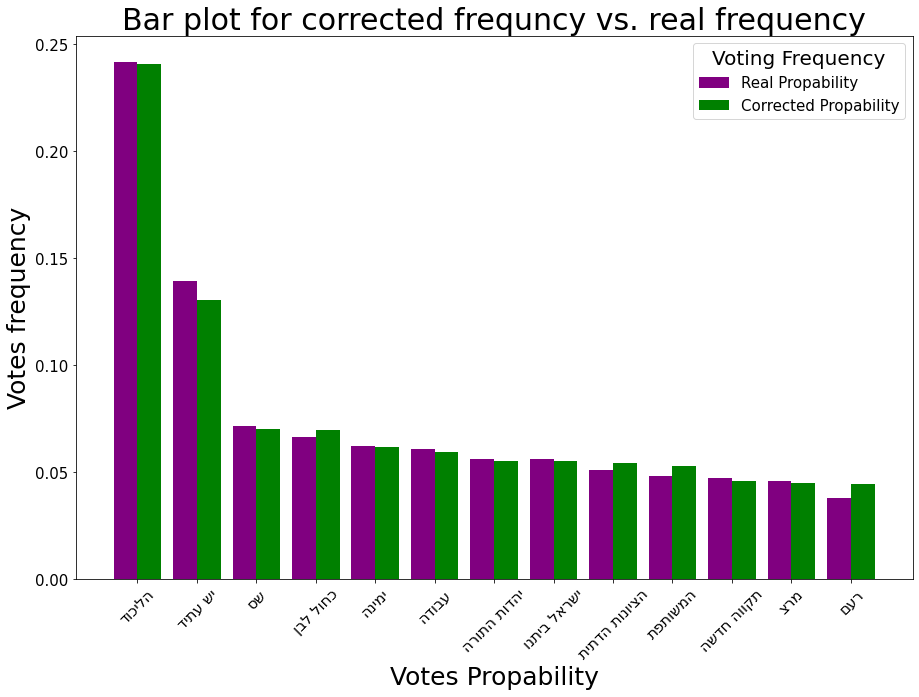

In [ ]:
names = largest_real_prob_ballot.keys()
fixed_names = [name[::-1] for name in names]
X = fixed_names
real_prob = largest_real_prob_ballot.values
correct_prob = largest_correction_ballot_prob.values
  
X_axis = np.arange(len(X))

plt.figure(figsize=(15,10)) 
plt.bar(X_axis - 0.2,real_prob, 0.4, label = 'Real Propability', color = 'purple')
plt.bar(X_axis + 0.2, correct_prob, 0.4, label = 'Corrected Propability',color = 'green')
plt.xticks(X_axis, X,fontsize = 15,rotation = 45)
plt.yticks(fontsize = 15)
plt.xlabel("Votes Propability",fontsize = 25)
plt.ylabel("Votes frequency",fontsize = 25)
plt.title("Bar plot for corrected frequncy vs. real frequency",fontsize = 30)
plt.legend(title ="Voting Frequency",title_fontsize = 20, fontsize = 15)
plt.show()

For mostparties, we didn't see a substantial difference between the two plots. Only for the "ימינה" party we found a difference. In the first plot, where we calculated the ratio per city, the "ימינה" party was expected to relatively recieve more votes. While for the second plot, where we calculated the ratio per ballot, they were expected to recieve less votes.